使用 seaborn 优化 matplotlib 的绘图

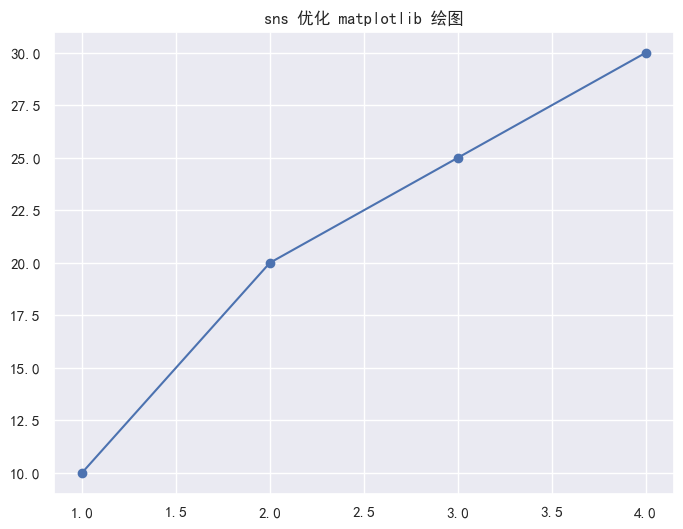

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook")

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], marker='o')
plt.title('sns 优化 matplotlib 绘图')
plt.show()

使用 seaborn 进行绘图

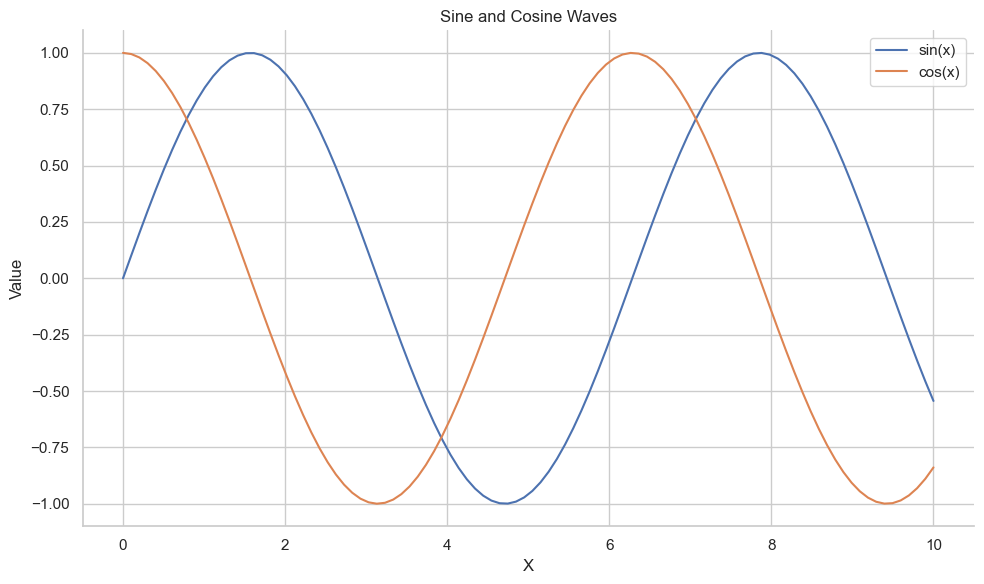

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置 Seaborn 样式
sns.set_theme(style="whitegrid")


# 生成数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 绘图
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y1, label="sin(x)")
sns.lineplot(x=x, y=y2, label="cos(x)")

plt.title("Sine and Cosine Waves")
plt.xlabel("X")
plt.ylabel("Value")
sns.despine()  # 去除边框
plt.legend()
plt.tight_layout()
plt.show()

后续使用鸢尾花数据集演示

In [4]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


绘制分类散点图

<Axes: xlabel='species', ylabel='sepal_length'>

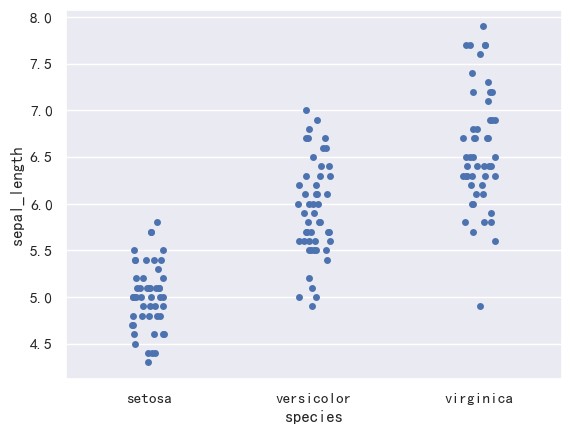

In [ ]:
# 探究 species 与 sepal_length 之间的关系
sns.stripplot(data=iris, x='species', y='sepal_length')


绘制分类分布图

<Axes: xlabel='species', ylabel='sepal_length'>

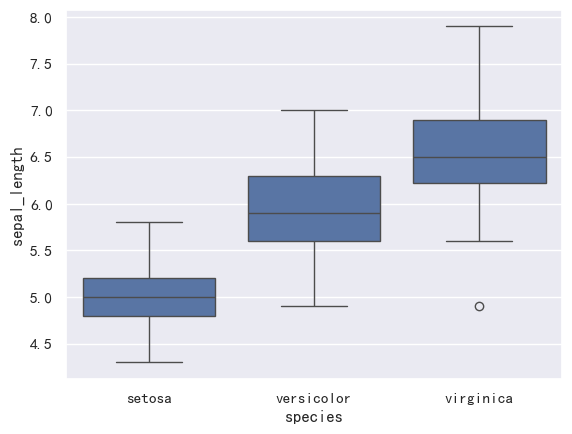

In [ ]:
sns.boxplot(data=iris, x='species', y='sepal_length')

绘制分类估计图

<Axes: xlabel='species', ylabel='sepal_length'>

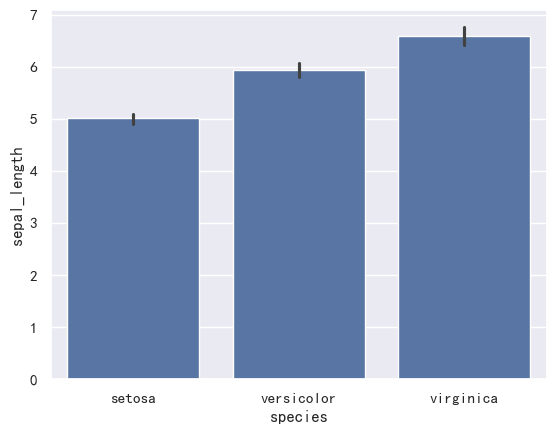

In [ ]:
sns.barplot(data=iris, x='species', y='sepal_length')

上述是具体的接口，但是实际上都可以通过 catplot + kind 参数控制

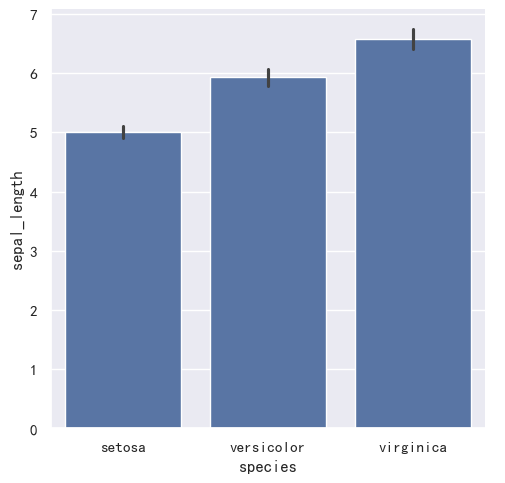

In [11]:
sns.catplot(data=iris, x='species', y='sepal_length', kind="bar")

绘制词云图

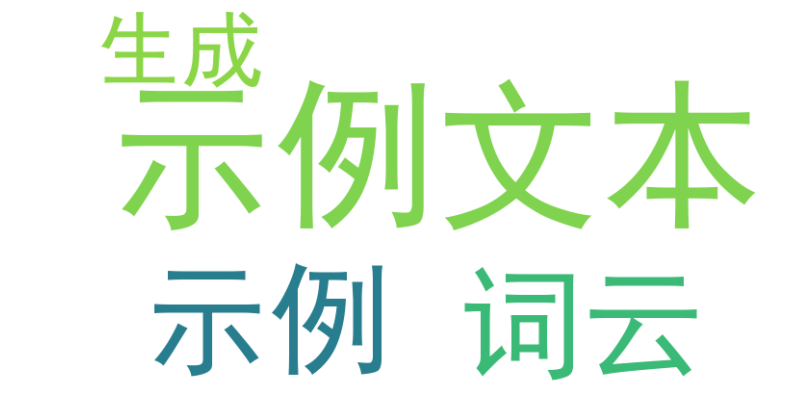

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "示例文本 示例 词云 生成 示例文本"

wordcloud = WordCloud(font_path='simhei.ttf',  # 设置字体路径，避免中文乱码
                      width=800, height=400,   # 设置词云的大小
                      max_words=200,           # 设置词云中最大单词数量
                      background_color="white" # 设置背景颜色
                      ).generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 不显示坐标轴
plt.show()

缺失值的处理
1. 发现缺失值
2. 处理缺失值

In [1]:
# 查看缺失值分布情况

import pandas as pd
import numpy as np

# 模拟一个电商用户行为数据集
data = {
    'user_id': [101, 102, 103, 104, 105, 106, 107, 108],
    'age': [25, np.nan, 30, np.nan, 35, 28, np.nan, 40],
    'gender': ['M', 'F', np.nan, 'M', 'F', 'M', 'F', 'M'],
    'purchase_amount': [200, 150, np.nan, 300, np.nan, np.nan, 220, 180],
    'category': ['Electronics', 'Clothing', 'Books', np.nan, 'Electronics', 'Books', 'Clothing', 'Electronics'],
    'review_score': [4.5, np.nan, np.nan, 5.0, np.nan, np.nan, 4.0, np.nan]
}

df = pd.DataFrame(data)
print("原始数据：")
print(df)

# 查看缺失值分布情况
missing_info = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_ratio': df.isna().sum() / len(df)
})

# 按缺失数量排序
missing_info = missing_info.sort_values(by='missing_count', ascending=False)

print("各列缺失值分布情况：")
print(missing_info)

原始数据：
   user_id   age gender  purchase_amount     category  review_score
0      101  25.0      M            200.0  Electronics           4.5
1      102   NaN      F            150.0     Clothing           NaN
2      103  30.0    NaN              NaN        Books           NaN
3      104   NaN      M            300.0          NaN           5.0
4      105  35.0      F              NaN  Electronics           NaN
5      106  28.0      M              NaN        Books           NaN
6      107   NaN      F            220.0     Clothing           4.0
7      108  40.0      M            180.0  Electronics           NaN
各列缺失值分布情况：
                 missing_count  missing_ratio
review_score                 5          0.625
age                          3          0.375
purchase_amount              3          0.375
gender                       1          0.125
category                     1          0.125
user_id                      0          0.000


对缺失值进行处理

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

# 设置随机种子，保证结果可复现
np.random.seed(42)

# 创建模拟数据
data = {
    'user_id': range(1001, 1021),
    'age': [25, np.nan, 30, np.nan, 35, 28, np.nan, 40, 22, 33,
            27, np.nan, 38, 29, np.nan, 31, 26, 34, np.nan, 36],
    'gender': ['M', 'F', np.nan, 'M', 'F', 'M', 'F', 'M', 'F', 'M',
               'F', 'M', np.nan, 'F', 'M', 'F', 'M', np.nan, 'F', 'M'],
    'purchase_amount': [200, 150, np.nan, 300, np.nan, np.nan, 220, 180, 130, np.nan,
                        250, 170, np.nan, 190, np.nan, 210, 160, np.nan, 140, 185],
    'category': ['Electronics', 'Clothing', 'Books', np.nan, 'Electronics', 'Books',
                 'Clothing', 'Electronics', 'Books', 'Clothing',
                 np.nan, 'Electronics', 'Books', 'Clothing', 'Electronics',
                 'Books', 'Clothing', 'Electronics', 'Books', 'Clothing'],
    'review_score': [4.5, np.nan, np.nan, 5.0, np.nan, np.nan, 4.0, 4.2, np.nan, np.nan,
                     4.8, 3.9, np.nan, 4.1, np.nan, 4.3, 3.8, np.nan, 4.0, 4.4]
}

df = pd.DataFrame(data)

In [4]:
df_mean = df.copy()

# 数值型用均值填充
df['age'] = df['age'].fillna(df['age'].mean())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['review_score'] = df['review_score'].fillna(df['review_score'].mean())

# 分类型用众数填充
df_mean['gender'] = df_mean['gender'].fillna(df_mean['gender'].mode()[0])
df_mean['category'] = df_mean['category'].fillna(df_mean['category'].mode()[0])

print("\n【方法一】均值/众数填充后（age 均值: {:.1f}）:".format(df['age'].mean()))
print(df_mean[['age', 'purchase_amount', 'review_score']].head())


【方法一】均值/众数填充后（age 均值: 31.0）:
    age  purchase_amount  review_score
0  25.0            200.0           4.5
1   NaN            150.0           NaN
2  30.0              NaN           NaN
3   NaN            300.0           5.0
4  35.0              NaN           NaN


In [6]:
# 前向填充

df_ffill = df.copy()
df_ffill = df_ffill.ffill()

print("\n【方法二】前向填充：")
print(df_ffill[['age', 'gender', 'purchase_amount']].head())


【方法二】前向填充：
    age gender  purchase_amount
0  25.0      M            200.0
1  31.0      F            150.0
2  30.0      M            150.0
3  31.0      M            300.0
4  35.0      F            300.0


使用泰坦尼克号的数据集分别展示几种数据类型转换的方式

In [28]:
import pandas as pd
import seaborn as sns

# 加载泰坦尼克号数据集
titanic = sns.load_dataset('titanic')

# 查看前几行数据和数据类型
print(titanic.head())
print(titanic.dtypes)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who

查看数据缺失情况

In [29]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# 处理缺失值
titanic = titanic.fillna({
        'age': titanic['age'].median(),
        'deck': 'C',
        'embarked': 'N'
    })

将 pclass（船舱等级）从 int64 转换为 category 类型

In [31]:
print(titanic['pclass'].dtype)
titanic['pclass'] = titanic['pclass'].astype('category')
print(titanic['pclass'].dtype)


int64
category


假设 fare 列中存在非数值字符（如 $ 符号），需要清理并转换为 float 类型

In [32]:
# 模拟带有符号的 fare 数据
titanic['fare_str'] = titanic['fare'].apply(lambda x: f"${x:.2f}")
print(titanic['fare_str'].dtype)
print(titanic['fare_str'].head())


object
0     $7.25
1    $71.28
2     $7.92
3    $53.10
4     $8.05
Name: fare_str, dtype: object


In [33]:
# titanic['fare_str'] = titanic['fare_str'].str.replace('$', '').astype(float)
# print(titanic['fare_str'].dtype)

# 使用更加健壮的方式
# errors='coerce' 会将无法转换的值设置为 NaN
titanic['fare_str'] = pd.to_numeric(titanic['fare_str'].str.replace('$', ''), errors='coerce')
print(titanic['fare_str'].dtype)


float64


泰坦尼克号数据集中没有日期字段，但我们可以模拟一个“出生日期”列并转换为 datetime 类型

In [36]:
# 构造一个出生日期列（假设年龄为整数）
titanic['birth_year'] = (2024 - titanic['age']).astype(int)
titanic['birth_date'] = titanic['birth_year'].astype(str) + '-01-01'

In [37]:
# 转换为 datetime 类型
titanic['birth_date'] = pd.to_datetime(titanic['birth_date'])
print(titanic['birth_date'].dtype)


datetime64[ns]


to_datetime 的关键参数

In [ ]:
import pandas as pd

date_str = '2023-01-01'
date = pd.to_datetime(date_str)
print(date)

# 处理多个日期
date_list = ['2023-01-01', '2023-02-01', '2023-03-01']
dates = pd.to_datetime(date_list)
print(dates)

# 使用 format 参数
date_str = '01/02/2023'
date = pd.to_datetime(date_str, format='%d/%m/%Y')
print(date)

# 处理无效日期
date_list = ['2023-01-01', 'invalid_date']
dates = pd.to_datetime(date_list, errors='coerce')
print(dates)


2023-01-01 00:00:00
DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01'], dtype='datetime64[ns]', freq=None)
2023-02-01 00:00:00
DatetimeIndex(['2023-01-01', 'NaT'], dtype='datetime64[ns]', freq=None)
2023-01-02 00:00:00


In [48]:
print(pd.to_datetime('01/02/2023', dayfirst=True))

2023-02-01 00:00:00
